<a href="https://colab.research.google.com/github/daudiii/CIFAR-AlexNet/blob/master/Copy_of_CIFAR_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset
print(torch.cuda.is_available())

True


In [3]:
transform2 = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=1), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform2)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=128,
                                          shuffle=True, num_workers=2)

tset = ConcatDataset((trainset, trainset2))
tloader = torch.utils.data.DataLoader(tset, batch_size=256,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 36, 138])


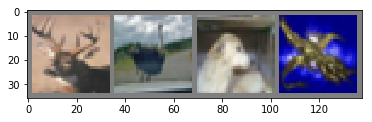

 deer  bird   dog  bird
torch.Size([3, 36, 138])


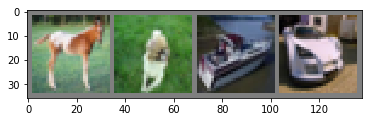

horse   dog  ship   car
torch.Size([3, 36, 138])


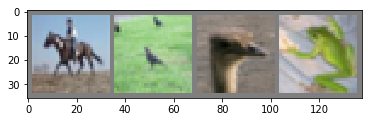

horse  bird  bird  frog


In [4]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    print(img.shape)
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")
    plt.show()


# get some random training images
dataiter = iter(trainloader2)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

dataiter = iter(tloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x


model = AlexNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
model.to(device)

cuda:0


AlexNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU(inplace)

In [0]:
#model.conv1.weight.data.fill_(1)
#model.conv2.weight.data.fill_(0.6)
#model.conv3.weight.data.fill_(0.3)
#model.conv4.weight.data.fill_(0.7)
#model.conv5.weight.data.fill_(1)

In [16]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001, weight_decay=0.0005)
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train


In [17]:
for epoch in range(10):
  running_loss = 0.0
  i=0;
  for data in tloader:
    x,y=data[0].to(device), data[1].to(device)
    output=model(x)
    loss=criterion(output,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i % 90 == 89:    # print every 90 mini-batches (390 total minis)
      print('[%d, %5d] loss: %.3f' %
      (epoch + 1, i + 1, running_loss/90))
      running_loss = 0.0
            
    i=i+1
print('Finished Training')



[1,    90] loss: 1.626
[1,   180] loss: 1.229
[1,   270] loss: 1.016
[1,   360] loss: 0.899
[2,    90] loss: 0.748
[2,   180] loss: 0.702
[2,   270] loss: 0.666
[2,   360] loss: 0.633
[3,    90] loss: 0.536
[3,   180] loss: 0.535
[3,   270] loss: 0.523
[3,   360] loss: 0.499
[4,    90] loss: 0.447
[4,   180] loss: 0.444
[4,   270] loss: 0.447
[4,   360] loss: 0.434
[5,    90] loss: 0.360
[5,   180] loss: 0.369
[5,   270] loss: 0.382
[5,   360] loss: 0.386
[6,    90] loss: 0.310
[6,   180] loss: 0.328
[6,   270] loss: 0.343
[6,   360] loss: 0.337
[7,    90] loss: 0.285
[7,   180] loss: 0.293
[7,   270] loss: 0.299
[7,   360] loss: 0.301
[8,    90] loss: 0.247
[8,   180] loss: 0.270
[8,   270] loss: 0.285
[8,   360] loss: 0.285
[9,    90] loss: 0.219
[9,   180] loss: 0.251
[9,   270] loss: 0.256
[9,   360] loss: 0.266
[10,    90] loss: 0.206
[10,   180] loss: 0.222
[10,   270] loss: 0.239
[10,   360] loss: 0.246
Finished Training


**Testing...**



torch.Size([3, 546, 274])


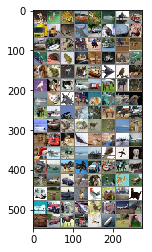

GroundTruth:   bird  deer  frog  ship


In [0]:
dataiter = iter(trainloader)
data = dataiter.next()
images, labels = data[0].to(device), data[1].to(device)

# print images
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
print(images.shape)
outputs = model(images)
print(outputs)

torch.Size([128, 3, 32, 32])
tensor([[-0.9557, -1.9163, -0.3927,  ...,  2.5735, -2.9666, -1.4030],
        [-2.2450, -3.1960,  2.1668,  ...,  1.5149, -5.1408, -4.6747],
        [-2.5930, -0.7117,  1.0754,  ..., -2.9920, -4.2467, -2.3648],
        ...,
        [ 0.9366,  0.6054, -0.0297,  ..., -1.9662,  2.0520, -0.2712],
        [-1.6651, -4.8665,  3.3489,  ..., -0.0277, -5.5516, -6.9378],
        [-0.7671, -0.9885,  1.2401,  ...,  1.4248, -2.5686, -0.6750]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse  deer  frog truck


In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 93 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 73 %
Accuracy of  bird : 56 %
Accuracy of   cat : 38 %
Accuracy of  deer : 46 %
Accuracy of   dog : 57 %
Accuracy of  frog : 68 %
Accuracy of horse : 60 %
Accuracy of  ship : 76 %
Accuracy of truck : 71 %


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train


In [0]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/colab/model.pth')

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
model.load_state_dict(torch.load("/content/gdrive/My Drive/colab/model.pth"))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])